In [1]:
import os
import difflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches as mpatches

import sys
sys.path.append('../../')
from rllte.evaluation.visualization import _annotate_and_decorate_axis, plot_interval_estimates
from rllte.evaluation import Performance
from utils import smooth

01 ICM (5, 20)
01 Disagreement (5, 20)
01 E3B (5, 20)
01 RND (5, 20)
01 PseudoCounts (5, 20)
01 RIDE (5, 20)
01 RE3 (0,)
01 NGU (5, 20)
05 ICM (5, 20)
05 Disagreement (5, 20)
05 E3B (5, 20)
05 RND (5, 20)
05 PseudoCounts (5, 20)
05 RIDE (5, 20)
05 RE3 (0,)
05 NGU (5, 20)
10 ICM (5, 20)
10 Disagreement (5, 20)
10 E3B (5, 20)
10 RND (5, 20)
10 PseudoCounts (5, 20)
10 RIDE (5, 20)
10 RE3 (5, 20)
10 NGU (5, 20)


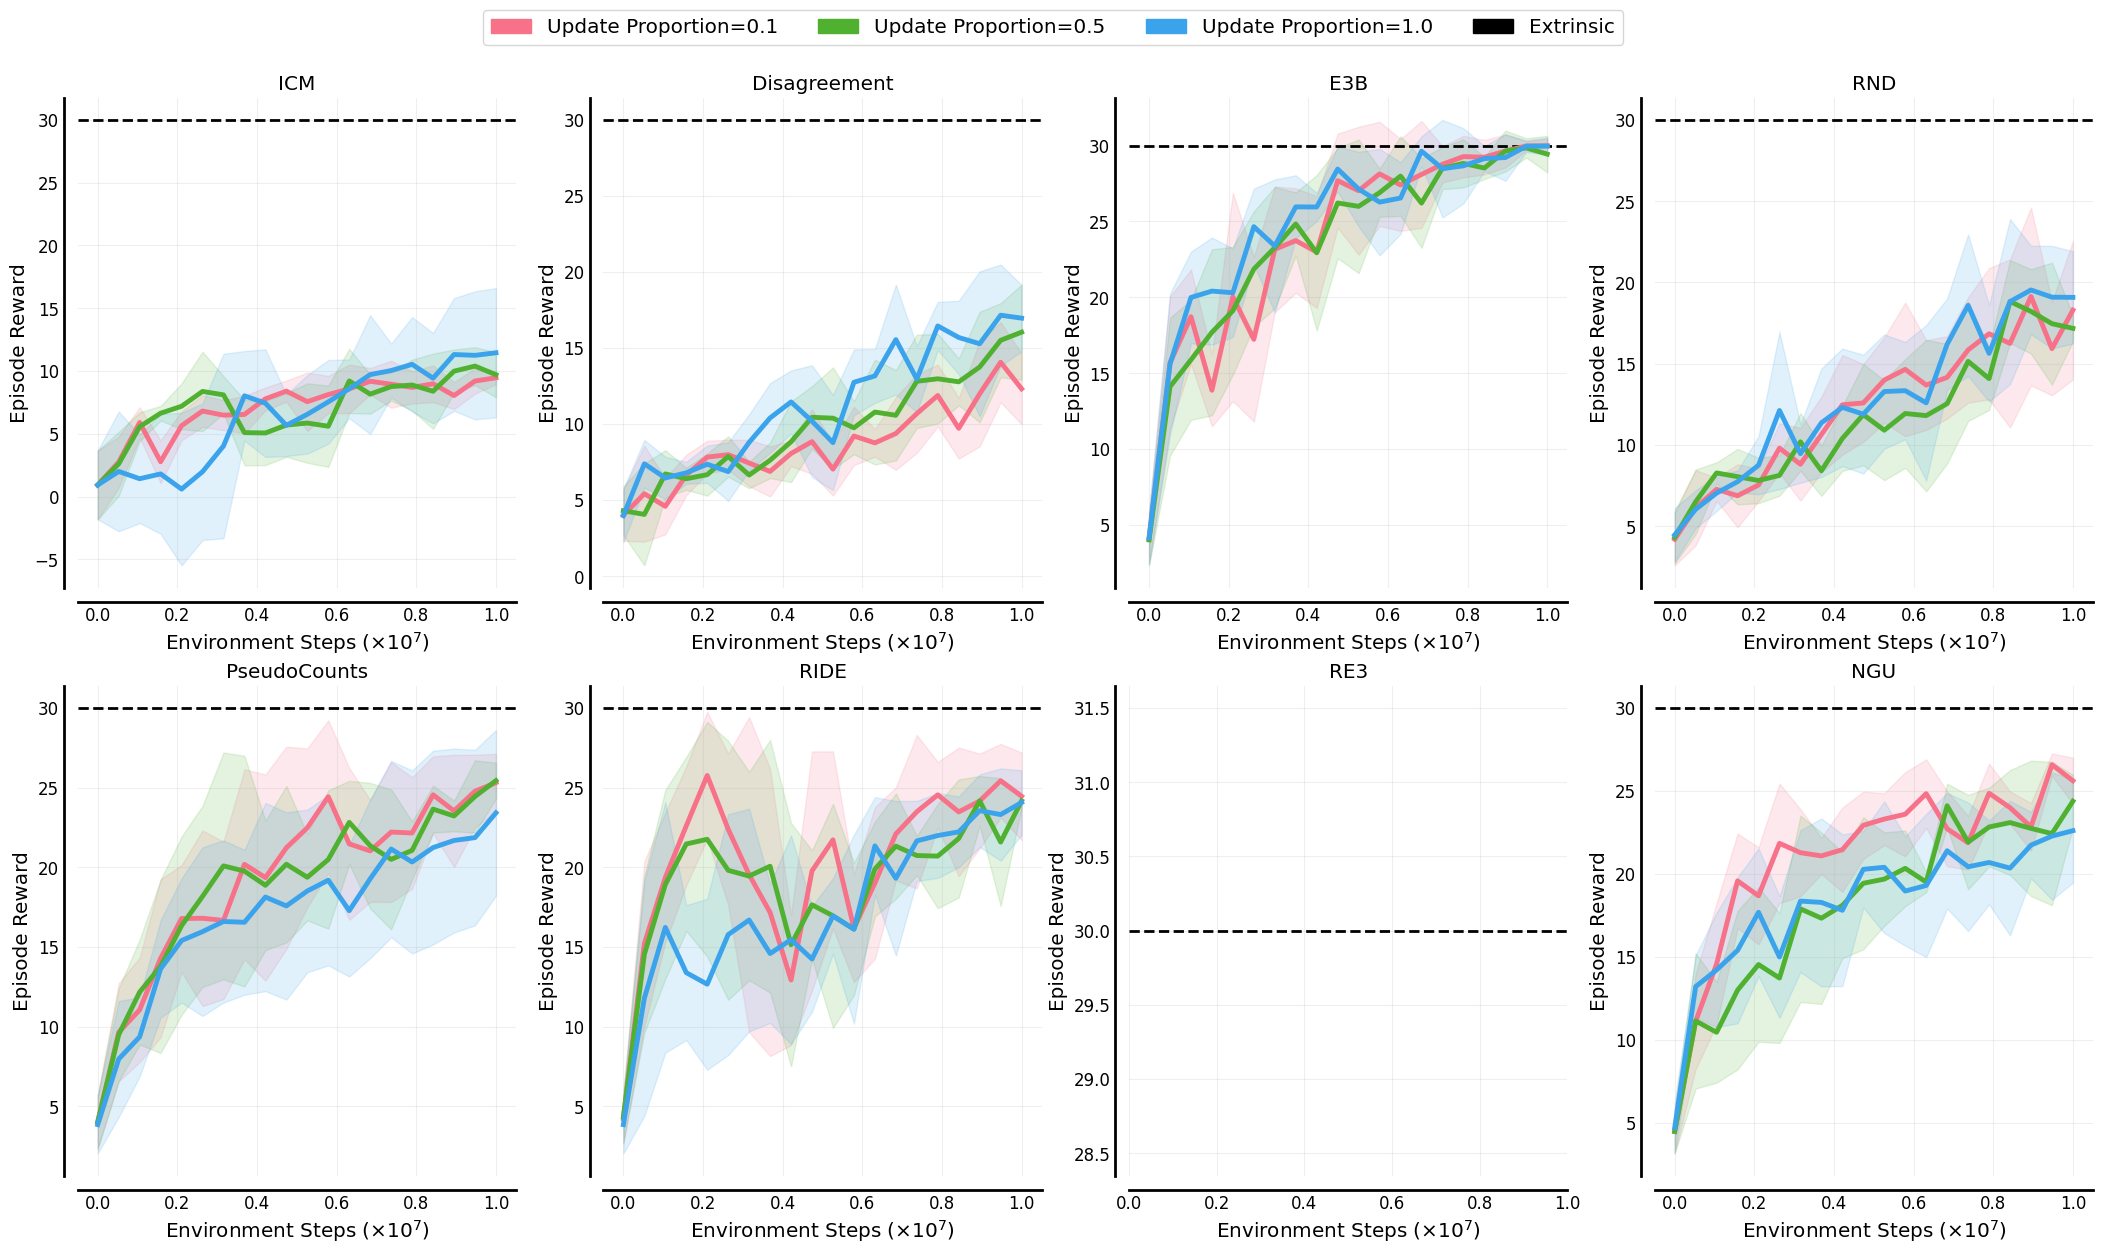

In [14]:
algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'RE3', 'NGU']
candidates = ['01', '05', '10']
legends = ['Update Proportion=0.1', 'Update Proportion=0.5', 'Update Proportion=1.0', 'Extrinsic']
colors = sns.husl_palette(len(candidates))
fake_patches = [mpatches.Patch(color=colors[i], label=alg) for i, alg in enumerate(candidates)]
fake_patches.append(mpatches.Patch(color='k', label="Extrinsic"))

fig, axes = plt.subplots(2, 4, figsize=(26, 14))

for subplot_idx, candidate in enumerate(candidates):
    root = f"/Users/yuanmingqi/Downloads/nips2024_data/q3_new/{candidate}/"
    num_points = 20
    all_data = {algo: [] for algo in algos}

    for algo in algos:
        for dir in os.listdir(root):
            if algo.lower() in dir:
                file = f"{root}/{dir}/"
                file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
                data = pd.read_csv(file)['episode_reward']
                data = data[np.linspace(0, data.shape[0]-1, num_points, dtype=int)]
                # data = smooth(data, 0.95)
                all_data[algo].append(data)

        all_data[algo] = np.array(all_data[algo])
        print(candidate, algo, all_data[algo].shape)

    for algo_idx, algo in enumerate(algos):
        if algo != 'RE3':
            mean, std = np.mean(all_data[algo], axis=0), np.std(all_data[algo], axis=0)
        ax = axes.flatten()[algo_idx]
        x = np.linspace(0, 1.0, num_points)
        if subplot_idx == 0:
            ax.axhline(y=30.0, color='k', linestyle='--', linewidth=2, label="Extrinsic")
        if algo != 'RE3':
            ax.plot(x, mean, linewidth=3.5, c=colors[subplot_idx], label=legends[subplot_idx])
            ax.fill_between(x, mean+std, mean-std, alpha=0.15, color=colors[subplot_idx])
        # ax.set_ylim(0, 10)
        ax.set_title(algos[algo_idx], fontsize="x-large")
        ax = _annotate_and_decorate_axis(ax, 
                                        ticklabelsize="large",
                                        xlabel=r"Environment Steps ($\times 10^7$)", 
                                        ylabel="Episode Reward",
                                        xticklabels=np.linspace(0, 1, num_points),
                                        )
        
fig.legend(fake_patches, legends, loc='upper center', 
    fancybox=True, ncol=len(algos), 
    fontsize='x-large',
    bbox_to_anchor=(0.5, 0.95))
fig.savefig('figure_rq3_curves.pdf', bbox_inches='tight', dpi=300)

In [13]:
algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'NGU']
candidates = ['01', '05', '10']

all_data = {candidate: {algo: [] for algo in algos} for candidate in candidates}
for subplot_idx, candidate in enumerate(candidates):
    root = f"/Users/yuanmingqi/Downloads/nips2024_data/q3_new/{candidate}/"

    for algo in algos:
        for dir in os.listdir(root):
            if algo.lower() in dir:
                file = f"{root}/{dir}/"
                file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
                data = pd.read_csv(file)['episode_reward']
                # average of the last 50 episodes
                all_data[candidate][algo].append(data[-50:].mean())

        all_data[candidate][algo] = np.expand_dims(np.array(all_data[candidate][algo]), axis=1)

for algo in algos:
    perf1 = Performance(all_data['01'][algo])
    perf2 = Performance(all_data['05'][algo])
    perf3 = Performance(all_data['10'][algo])
    perf1_iqm = perf1.aggregate_mean().round(4)
    perf2_iqm = perf2.aggregate_mean().round(4)
    perf3_iqm = perf3.aggregate_mean().round(4)
    best_candidate = np.argmax([perf1_iqm, perf2_iqm, perf3_iqm])
    # find the best candidate by comparing the iqm
    print(algo, perf1_iqm, perf2_iqm, perf3_iqm, candidates[best_candidate])

ICM 9.1001 9.7025 10.8389 10
Disagreement 12.6437 15.211 17.3591 10
E3B 30.079 29.4145 29.9851 01
RND 18.3746 17.615 18.3632 01
PseudoCounts 25.556 25.7585 22.4603 05
RIDE 25.143 24.4032 23.9517 01
NGU 25.4928 24.0476 23.2425 01


In [ ]:
algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'NGU']
titles = ['Update Proportion=0.1', 'Update Proportion=0.5', 'Update Proportion=1.0']
# colors = sns.color_palette("husl", len(algos))
colors = sns.husl_palette(len(algos), h=.5)
fake_patches = [mpatches.Patch(color=colors[i], label=alg) for i, alg in enumerate(algos)]

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for subplot_idx, candidate in enumerate(['01', '05', '10']):
    root = f"./data/q3/{candidate}/"
    num_points = 10
    all_data = {algo: [] for algo in algos}

    ax = axes[subplot_idx]

    for algo in algos:
        for dir in os.listdir(root):
            if algo.lower() in dir:
                file = f"{root}/{dir}/"
                file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
                data = pd.read_csv(file)['episode_reward']
                data = data[np.linspace(0, data.shape[0]-1, num_points, dtype=int)]
                data = smooth(data, 0.95)
                all_data[algo].append(data)

        all_data[algo] = np.array(all_data[algo])

    x = np.linspace(0, 1, num_points)
    ax.axhline(y=30.0, color='k', linestyle='--', linewidth=2, label="Extrinsic")
    for algo, color in zip(algos, colors):
        mean, std = np.mean(all_data[algo], axis=0), np.std(all_data[algo], axis=0)
        ax.plot(x, mean, linewidth=2.5, marker='o', markersize=6, c=color, label=algo)
        ax.fill_between(x, mean+std, mean-std, alpha=0.15, color=color)

    ax.set_title(titles[subplot_idx], fontsize="x-large")
    ax = _annotate_and_decorate_axis(ax, 
                                    ticklabelsize="large",
                                    xlabel=r"Environment Steps ($\times 10^7$)", 
                                    ylabel="Episode Reward",
                                    xticklabels=np.linspace(0, 1, num_points),
                                    )
fig.legend(fake_patches, algos, loc='upper center', 
    fancybox=True, ncol=len(algos), 
    fontsize='x-large',
    bbox_to_anchor=(0.5, 1.05))
fig.savefig('figure_rq3_curves.pdf', bbox_inches='tight', dpi=300)